In [1]:
import pandas as pd
import math
import scipy.stats as stats

In [51]:
df = pd.read_csv("eik.csv", sep=";", decimal=",")

In [52]:
df

,Boom,Regio,Grootte,Volume,Hoogte
0,1,Atlantic,24196,1.4,27.0
1,2,Atlantic,7900,3.4,21.0
2,3,Atlantic,23038,9.1,25.0
3,4,Atlantic,17042,1.6,3.0
4,5,Atlantic,7646,10.5,24.0
5,6,Atlantic,19938,2.5,17.0
6,7,Atlantic,7985,0.9,15.0
7,8,Atlantic,8897,6.8,0.3
8,9,Atlantic,8982,1.8,24.0
9,10,Atlantic,233,0.3,11.0


 Beschouw de 3 laatste cijfers ijk=753 van je studentennummer. 
 Verwijder vervolgens de rijen 
 k + 1, 
 j + 1, 
 i+ 1, 
 jk + 1, 
 ij + 1, 
 ik + 1, 
 ijk + 1, 
 i+j+k + 1 
 uit de dataset. 

In [53]:
i=7
j=5
k=3

to_delete = [k + 1, 
             j + 1, 
             i+ 1, 
             j*k + 1, 
             i*j + 1, 
             i*k + 1, 
             #i*j*k + 1, not in the set
             i+j+k + 1 ]

In [54]:
to_delete

[4, 6, 8, 16, 36, 22, 16]

In [55]:
df = df.drop(to_delete)

In [70]:
df

,Boom,Regio,Grootte,Volume,Hoogte,Volume_log,Grootte_log,Volume_sqrt,Grootte_sqrt,Log_Volume,Log_Grootte,Square root_Volume,Square root_Grootte
0,1,Atlantic,24196.0,1.4,27.0,0.336472,10.093943,1.183216,155.550635,0.336472,10.093943,1.183216,155.550635
1,2,Atlantic,7900.0,3.4,21.0,1.223775,8.974618,1.843909,88.881944,1.223775,8.974618,1.843909,88.881944
2,3,Atlantic,23038.0,9.1,25.0,2.208274,10.044900,3.016621,151.782739,2.208274,10.044900,3.016621,151.782739
3,4,Atlantic,17042.0,1.6,3.0,0.470004,9.743436,1.264911,130.545011,0.470004,9.743436,1.264911,130.545011
5,6,Atlantic,19938.0,2.5,17.0,0.916291,9.900383,1.581139,141.201983,0.916291,9.900383,1.581139,141.201983
7,8,Atlantic,8897.0,6.8,0.3,1.916923,9.093469,2.607681,94.323910,1.916923,9.093469,2.607681,94.323910
9,10,Atlantic,233.0,0.3,11.0,-1.203973,5.451038,0.547723,15.264338,-1.203973,5.451038,0.547723,15.264338
10,11,Atlantic,1598.0,0.9,15.0,-0.105361,7.376508,0.948683,39.974992,-0.105361,7.376508,0.948683,39.974992
11,12,Atlantic,1745.0,0.8,23.0,-0.223144,7.464510,0.894427,41.773197,-0.223144,7.464510,0.894427,41.773197
12,13,Atlantic,17042.0,2.0,24.0,0.693147,9.743436,1.414214,130.545011,0.693147,9.743436,1.414214,130.545011


In [39]:
df.describe()

,Boom,Grootte,Volume,Hoogte,Log_Volume,Log_Grootte,Square root_Volume,Square root_Grootte,Inverse_Volume,Inverse_Grootte,Box-Cox_Volume,Box-Cox_Grootte,Yeo-Johnson_Volume,Yeo-Johnson_Grootte
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,20.000000,7882.564103,3.341026,17.341026,0.760534,8.072083,1.640114,75.119244,0.718954,0.002728,0.736314,27.911778,0.879167,27.728165
std,11.401754,8054.823121,3.452971,8.504417,0.970404,1.732634,0.817426,47.943736,0.720112,0.012248,0.945824,11.534891,0.344518,11.415227
min,1.000000,13.000000,0.300000,0.300000,-1.203973,2.564949,0.547723,3.605551,0.058480,0.000035,-1.228209,3.574038,0.246451,3.708174
25%,10.500000,827.500000,1.100000,10.000000,0.095310,6.718407,1.048809,28.766288,0.226118,0.000086,0.095160,17.145718,0.623757,17.066930
50%,20.000000,5328.000000,1.800000,18.000000,0.587787,8.580731,1.341641,72.993150,0.555556,0.000188,0.582123,29.461740,0.811610,29.267301
75%,29.500000,11924.500000,4.450000,24.000000,1.489801,9.375293,2.107868,108.898756,0.909091,0.001208,1.453677,36.721197,1.157045,36.449838
max,39.000000,28389.000000,17.100000,30.000000,2.839078,10.253757,4.135215,168.490356,3.333333,0.076923,2.710146,46.518504,1.560837,46.134620


In [92]:
transformations = {'Log': np.log, 'Square root': np.sqrt}

for name, function in transformations.items():
    df[name + '_Volume'] = function(df['Volume'])
    df[name + '_Grootte'] = function(df['Grootte'])
    df[name + '_Hoogte'] = function(df['Hoogte'])

## Bestudeer en bespreek de verdeling van de variabelen Volume en Grootte. Bespreek hiertoe
## 3 gepaste grafische voorstellingen. Ga ook op een formele manier na of de gegevens normaal
## Verdeeld zijn. Indien dit niet het geval is, in welke zin wijken de gegevens af van normaal
## verdeelde gegevens? Bespreek.

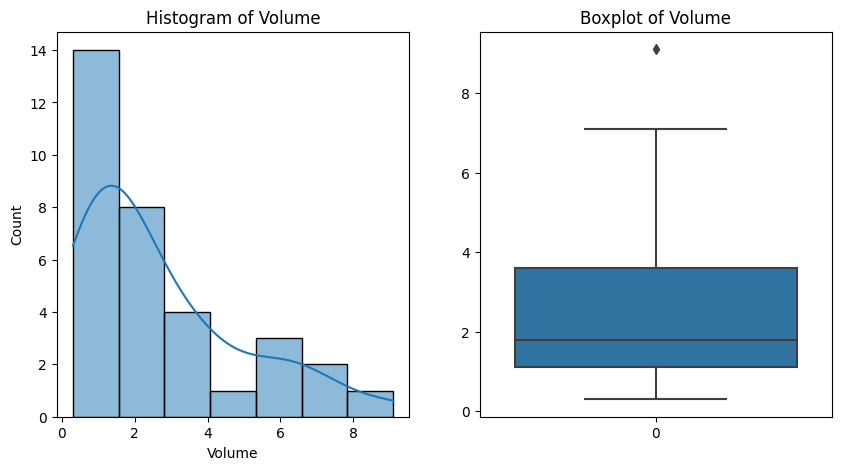

count    33.000000
mean      2.639394
std       2.258033
min       0.300000
25%       1.100000
50%       1.800000
75%       3.600000
max       9.100000
Name: Volume, dtype: float64


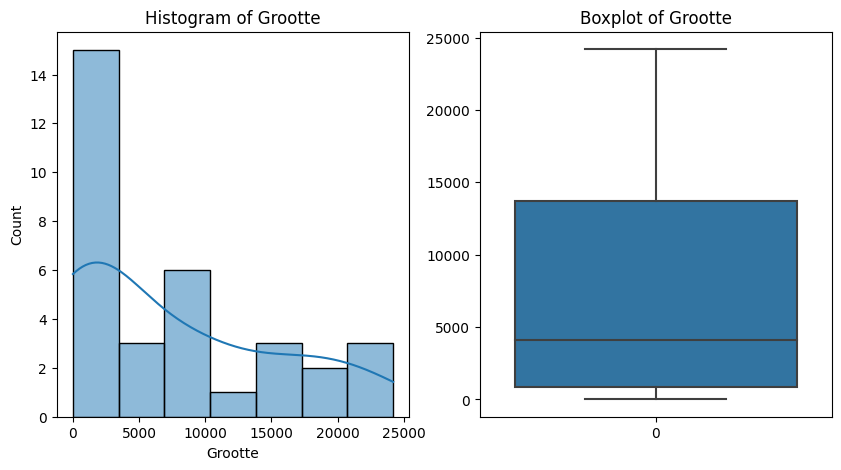

count       33.000000
mean      7568.181818
std       7852.979822
min         13.000000
25%        826.000000
50%       4082.000000
75%      13688.000000
max      24196.000000
Name: Grootte, dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Voor 'Volume'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Volume'], kde=True)
plt.title('Histogram of Volume')

plt.subplot(1, 2, 2)
sns.boxplot(df['Volume'])
plt.title('Boxplot of Volume')

plt.show()

print(df['Volume'].describe())

# Voor 'Grootte'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Grootte'], kde=True)
plt.title('Histogram of Grootte')

plt.subplot(1, 2, 2)
sns.boxplot(df['Grootte'])
plt.title('Boxplot of Grootte')

plt.show()

print(df['Grootte'].describe())


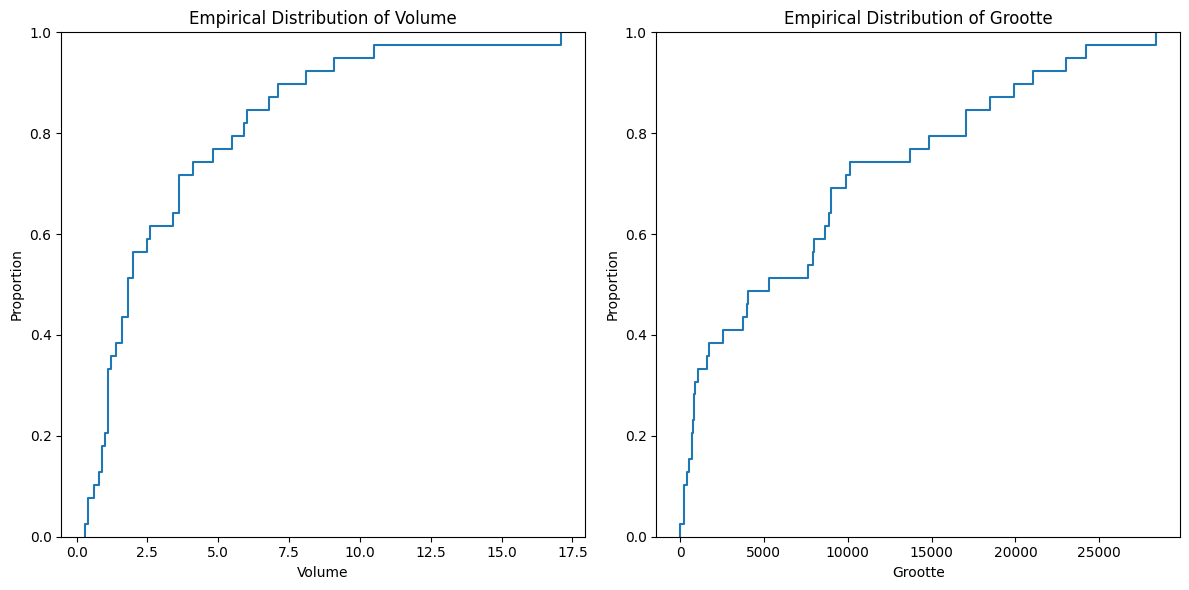

In [40]:
import seaborn as sns

# Empirical distribution for 'Volume'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # subplot 1 (1 row, 2 columns, first plot)
sns.ecdfplot(df['Volume'])
plt.title('Empirical Distribution of Volume')

# Empirical distribution for 'Grootte'
plt.subplot(1, 2, 2) # subplot 2 (1 row, 2 columns, second plot)
sns.ecdfplot(df['Grootte'])
plt.title('Empirical Distribution of Grootte')

plt.tight_layout()
plt.show()


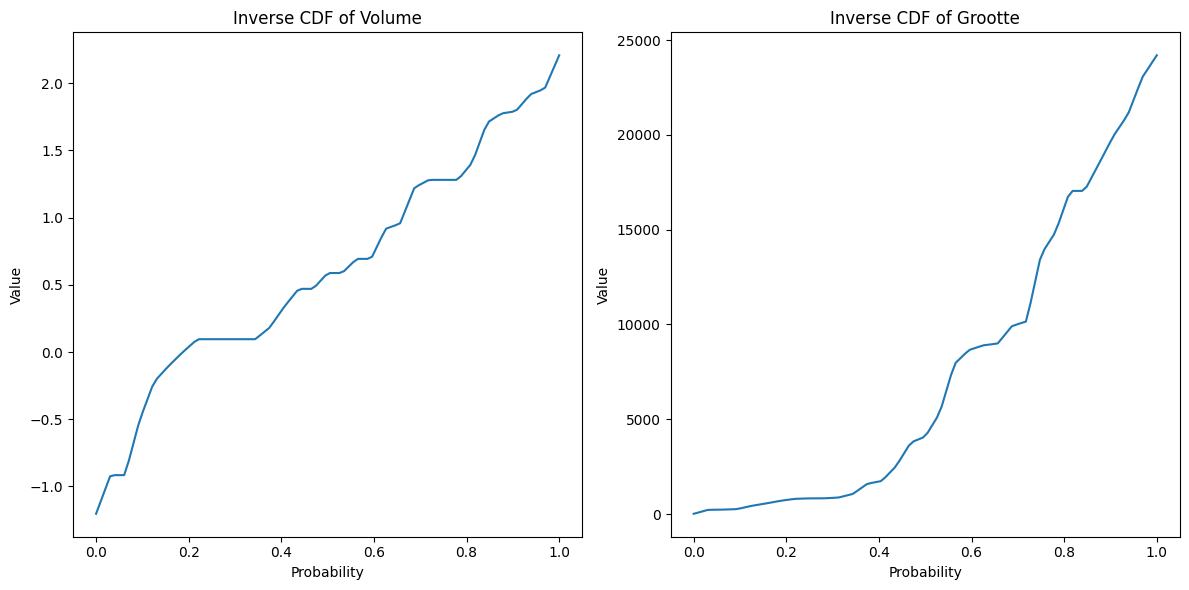

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the quantiles
volume_quantiles = df['Log_Volume'].quantile(np.linspace(0, 1, 100))
grootte_quantiles = df['Grootte'].quantile(np.linspace(0, 1, 100))

# Inverse CDF (quantile function) for 'Volume'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # subplot 1 (1 row, 2 columns, first plot)
plt.plot(np.linspace(0, 1, 100), volume_quantiles)
plt.xlabel('Probability')
plt.ylabel('Value')
plt.title('Inverse CDF of Volume')

# Inverse CDF (quantile function) for 'Grootte'
plt.subplot(1, 2, 2) # subplot 2 (1 row, 2 columns, second plot)
plt.plot(np.linspace(0, 1, 100), grootte_quantiles)
plt.xlabel('Probability')
plt.ylabel('Value')
plt.title('Inverse CDF of Grootte')

plt.tight_layout()
plt.show()


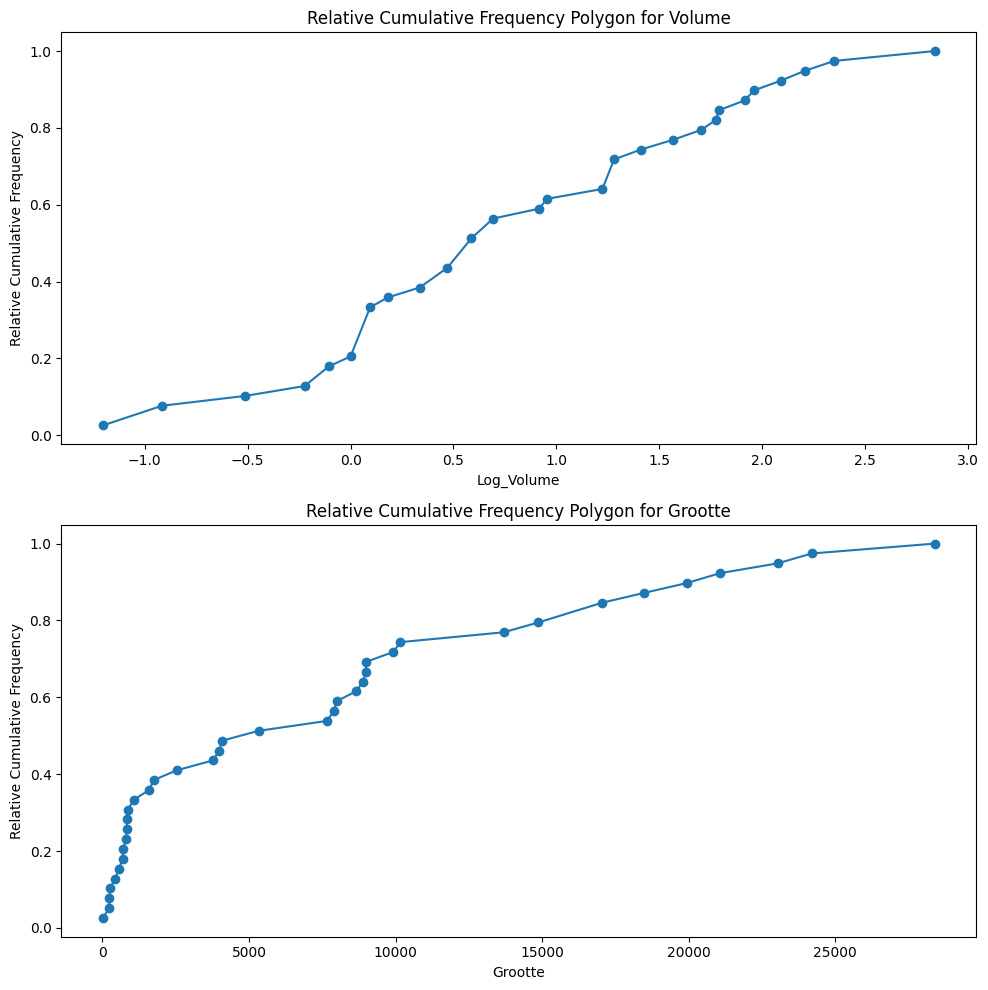

In [46]:
def plot_relative_cumulative_frequency(df, column, ax):
    # Calculate relative frequency
    relative_frequency = df[column].value_counts(normalize=True).sort_index().cumsum()
    
    # Plot with linear interpolation
    ax.plot(relative_frequency.index, relative_frequency.values, marker='o')
    ax.set_xlabel(column)
    ax.set_ylabel('Relative Cumulative Frequency')

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

plot_relative_cumulative_frequency(df, 'Log_Volume', ax[0])
ax[0].set_title('Relative Cumulative Frequency Polygon for Volume')

plot_relative_cumulative_frequency(df, 'Grootte', ax[1])
ax[1].set_title('Relative Cumulative Frequency Polygon for Grootte')

plt.tight_layout()
plt.show()


In [9]:
# Voor 'Volume'
stat, p = shapiro(df['Volume'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Voor Volume, de data lijkt normaal verdeeld (niet verwerpen H0)')
else:
    print('Voor Volume, de data lijkt niet normaal verdeeld (verwerpen H0)')

# Voor 'Grootte'
stat, p = shapiro(df['Grootte'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Voor Grootte, de data lijkt normaal verdeeld (niet verwerpen H0)')
else:
    print('Voor Grootte, de data lijkt niet normaal verdeeld (verwerpen H0)')

Statistics=0.843, p=0.000
Voor Volume, de data lijkt niet normaal verdeeld (verwerpen H0)
Statistics=0.844, p=0.000
Voor Grootte, de data lijkt niet normaal verdeeld (verwerpen H0)


In [10]:
from scipy.stats import kstest, f

# Het schatten van parameters voor de F-distributie
params = f.fit(df['Volume'])

# Uitvoeren van de K-S test
ks_statistic, p_value = kstest(df['Volume'], 'f', params)

print(f"K-S statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print('Voor Volume, de data lijkt de F-verdeling te volgen (niet verwerpen H0)')
else:
    print('Voor Volume, de data lijkt niet de F-verdeling te volgen (verwerpen H0)')

# Herhaal hetzelfde voor 'Grootte'
params = f.fit(df['Grootte'])
ks_statistic, p_value = kstest(df['Grootte'], 'f', params)

print(f"K-S statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print('Voor Grootte, de data lijkt de F-verdeling te volgen (niet verwerpen H0)')
else:
    print('Voor Grootte, de data lijkt niet de F-verdeling te volgen (verwerpen H0)')


/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


K-S statistic: 0.30031729372493804
P-value: 0.0038958451344729417
Voor Volume, de data lijkt niet de F-verdeling te volgen (verwerpen H0)
K-S statistic: 0.1670950770959967
P-value: 0.28277681025089285
Voor Grootte, de data lijkt de F-verdeling te volgen (niet verwerpen H0)


In [14]:
df['log_Volume'] = np.log(df['Volume'])

import statsmodels.api as sm

# Onafhankelijke variabele X en afhankelijke variabele Y definiëren
X = df['log_Volume']
Y = df['Hoogte']

# Een constante toevoegen aan de onafhankelijke variabele
X = sm.add_constant(X)

# Een instantie van het model maken
model = sm.OLS(Y, X)

# Het model aanpassen aan de data
result = model.fit()

# De resultaten samenvatten en printen
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.892
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0575
Time:                        17:24:50   Log-Likelihood:                -116.50
No. Observations:                  33   AIC:                             237.0
Df Residuals:                      31   BIC:                             240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0609      1.817      8.290      0.0

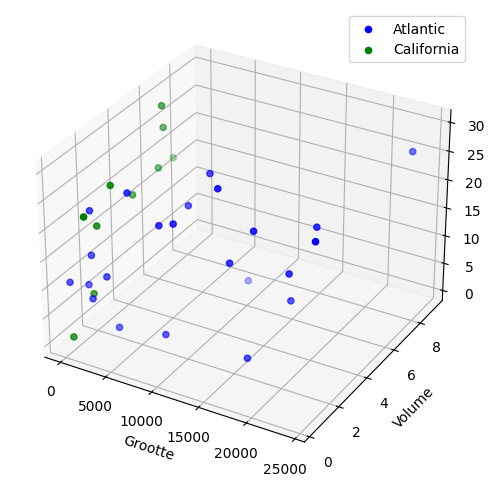

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# plot the points where Regio is 'Atlantic' and 'California' in different colors
for regio, color in [('Atlantic', 'b'), ('California', 'g')]:
    mask = df['Regio'] == regio
    ax.scatter(df['Grootte'][mask], df['Volume'][mask], df['Hoogte'][mask], c=color, label=regio)

ax.set_xlabel('Grootte')
ax.set_ylabel('Volume')
ax.set_zlabel('Hoogte')

plt.legend()
plt.show()


In [19]:
import plotly.express as px

# create a color column based on the 'Regio' column
df['color'] = df['Regio'].map({'Atlantic': 'blue', 'California': 'green'})

fig = px.scatter_3d(df, x='Grootte', y='Volume', z='Hoogte', color='color', hover_name='Regio')

fig.show(renderer='iframe')

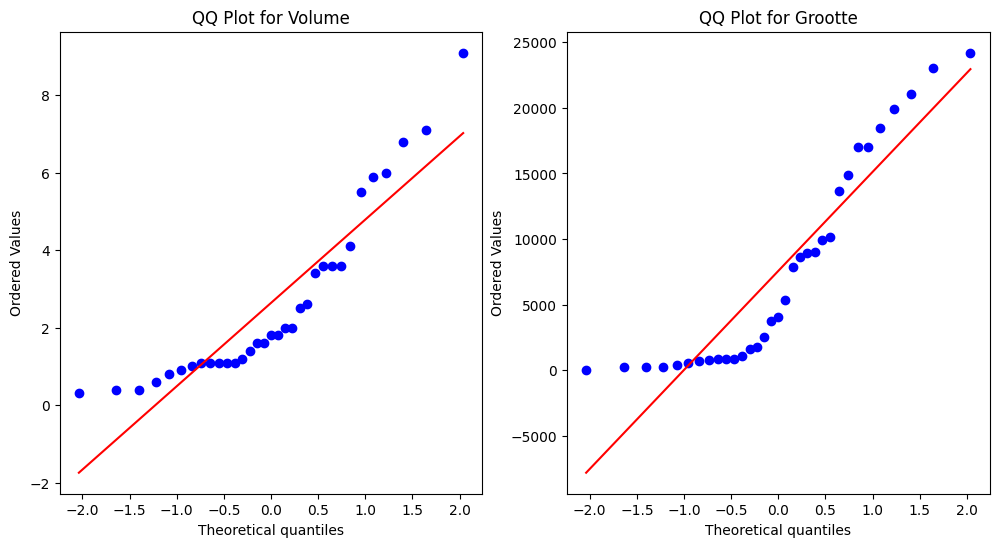

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ plot for 'Volume'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # subplot 1 (1 row, 2 columns, first plot)
stats.probplot(df['Volume'], dist='norm', plot=plt)
plt.title('QQ Plot for Volume')

# QQ plot for 'Grootte'
plt.subplot(1, 2, 2) # subplot 2 (1 row, 2 columns, second plot)
stats.probplot(df['Grootte'], dist='norm', plot=plt)
plt.title('QQ Plot for Grootte')

plt.show()


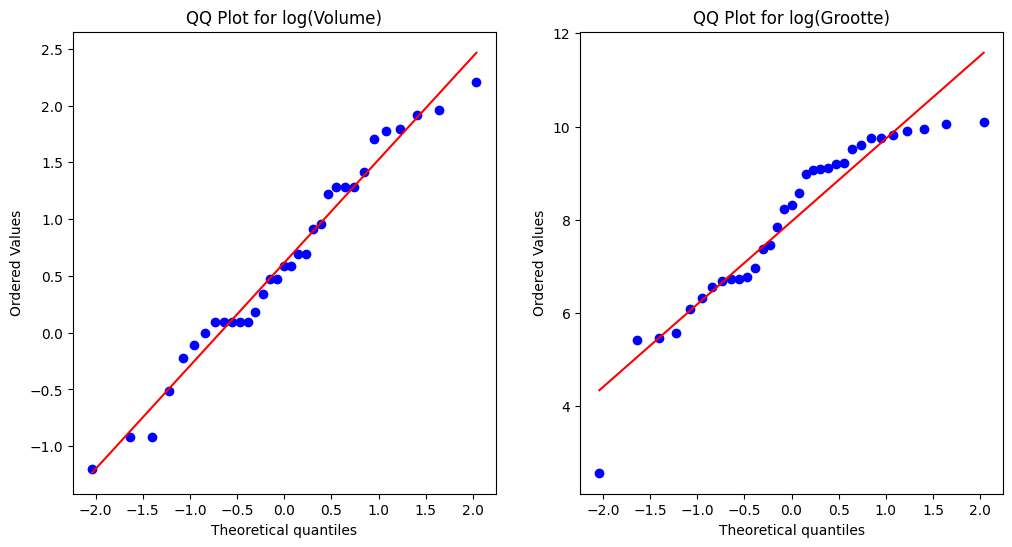

In [31]:
# QQ plot for log-transformed 'Volume'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # subplot 1 (1 row, 2 columns, first plot)
stats.probplot(np.log(df['Volume']), dist='norm', plot=plt)
plt.title('QQ Plot for log(Volume)')

# QQ plot for log-transformed 'Grootte'
plt.subplot(1, 2, 2) # subplot 2 (1 row, 2 columns, second plot)
stats.probplot(np.log(df['Grootte']), dist='norm', plot=plt)
plt.title('QQ Plot for log(Grootte)')

plt.show()


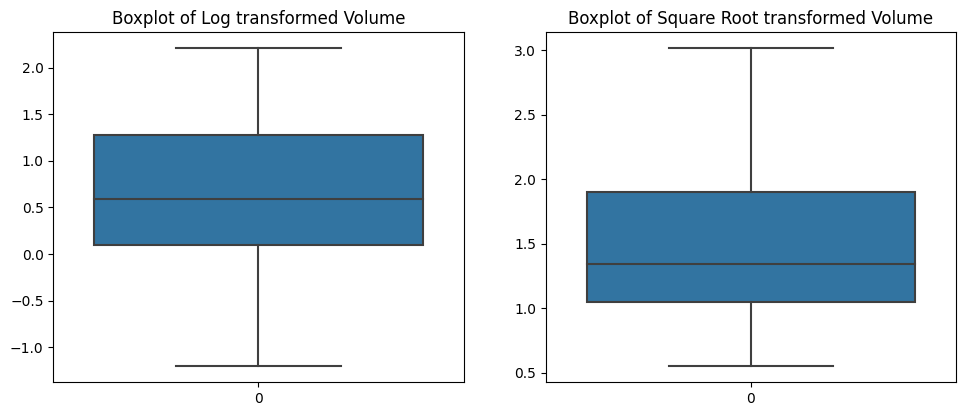

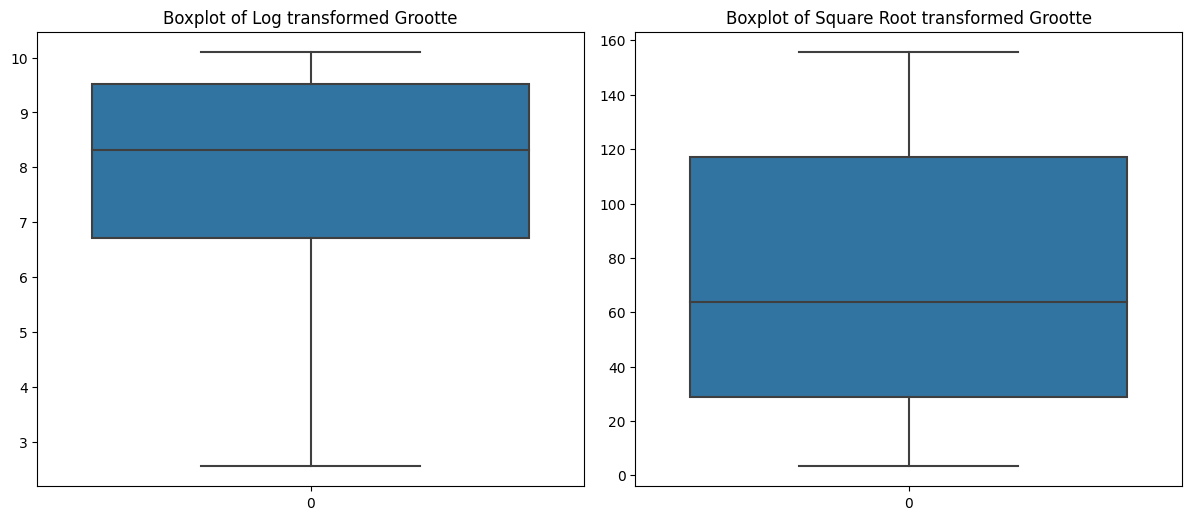

In [57]:
import seaborn as sns

# Create new columns with transformations
df['Volume_log'] = np.log(df['Volume'])
df['Grootte_log'] = np.log(df['Grootte'])

df['Volume_sqrt'] = np.sqrt(df['Volume'])
df['Grootte_sqrt'] = np.sqrt(df['Grootte'])


# Create boxplots for Volume
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
sns.boxplot(df['Volume_log'])
plt.title('Boxplot of Log transformed Volume')

plt.subplot(2, 3, 2)
sns.boxplot(df['Volume_sqrt'])
plt.title('Boxplot of Square Root transformed Volume')

# Create boxplots for Grootte
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
sns.boxplot(df['Grootte_log'])
plt.title('Boxplot of Log transformed Grootte')

plt.subplot(2, 3, 2)
sns.boxplot(df['Grootte_sqrt'])
plt.title('Boxplot of Square Root transformed Grootte')




plt.tight_layout()
plt.show()

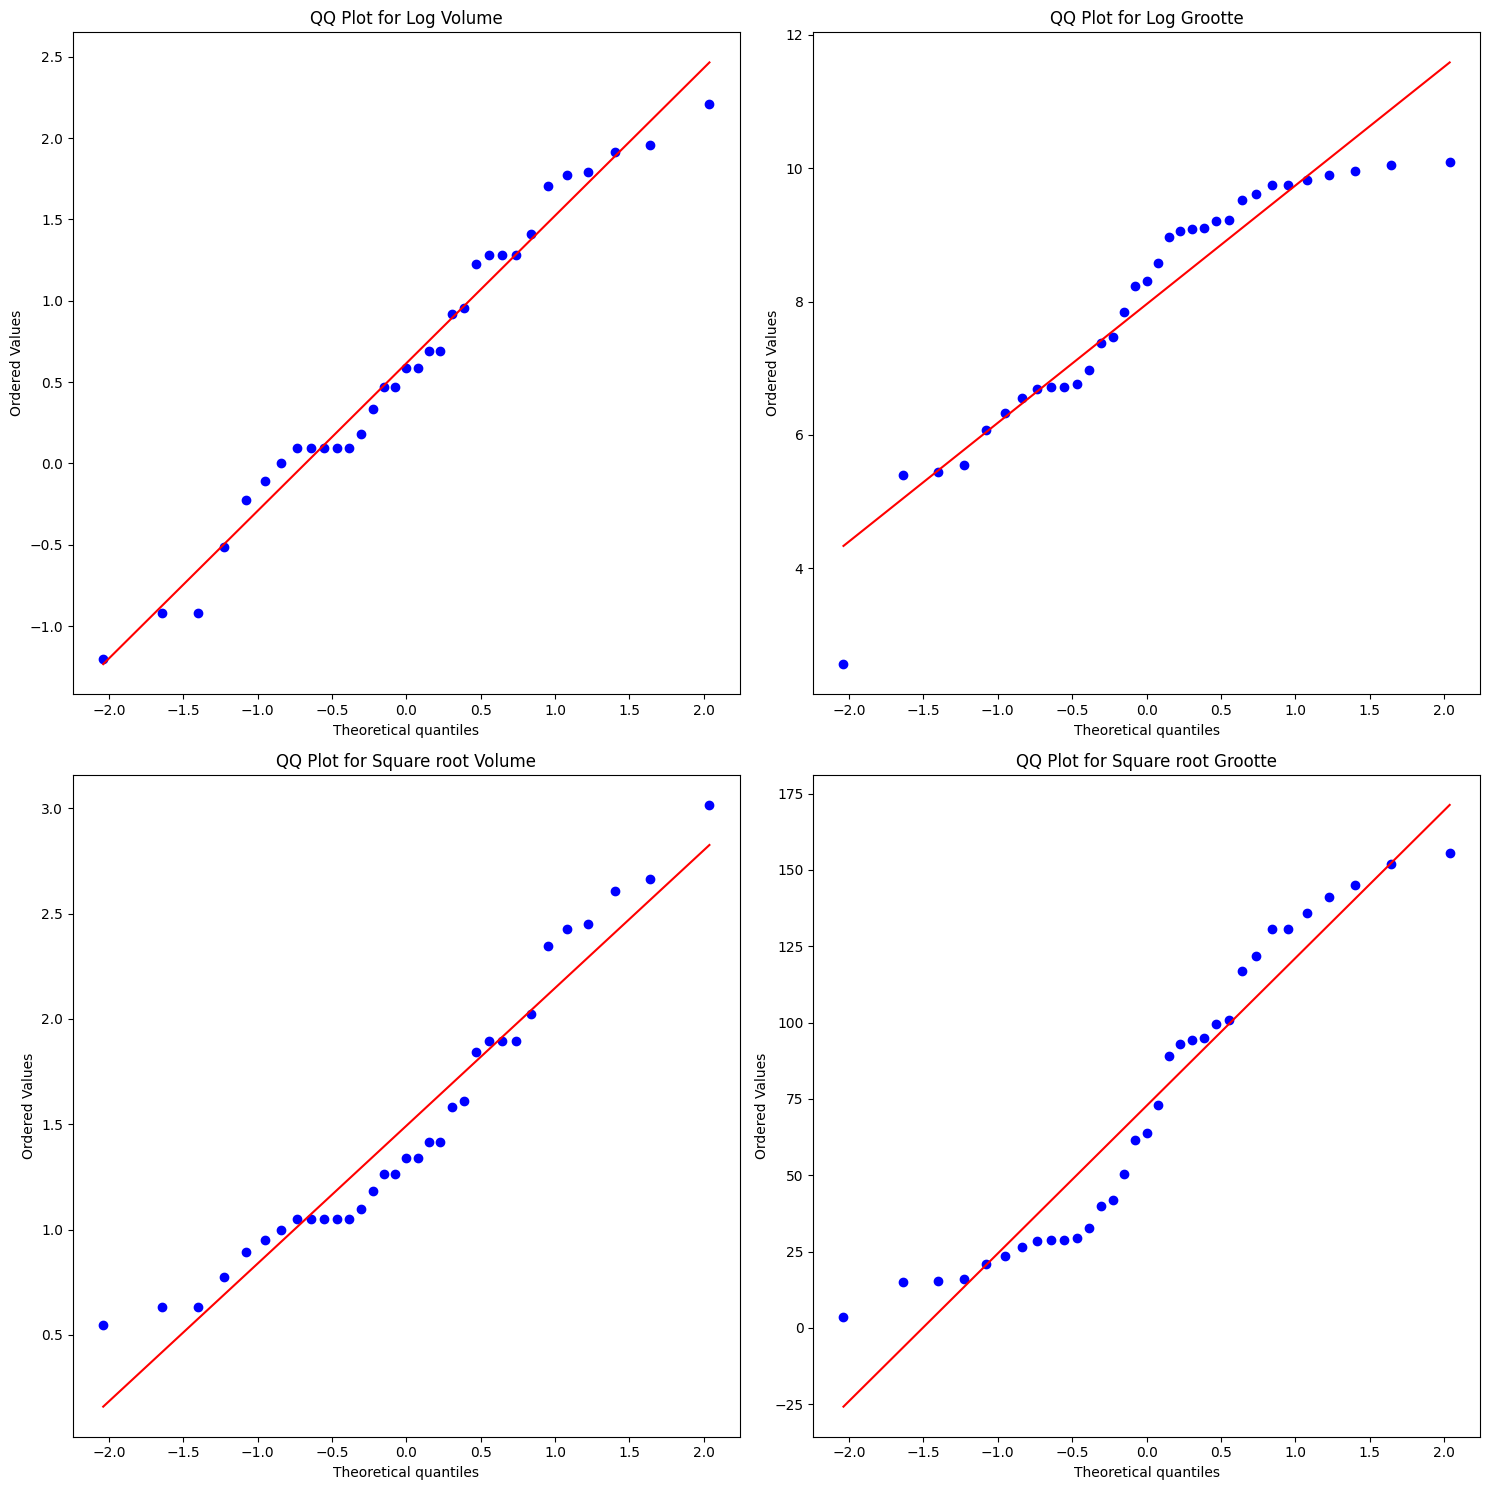

In [60]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt


# Set up the figure for the QQ plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Apply transformations and plot
transformations = {'Log': np.log, 
                   'Square root': np.sqrt, }

# Ensure 'Volume' and 'Grootte' don't have zeros or negatives
df.loc[df['Volume'] <= 0, 'Volume'] = np.nan
df.loc[df['Grootte'] <= 0, 'Grootte'] = np.nan

# Loop through transformations
for i, (name, function) in enumerate(transformations.items()):
    
    
    df[name + '_Volume'] = function(df['Volume'])
    df[name + '_Grootte'] = function(df['Grootte'])
    
    # Plot QQ plot for Volume
    stats.probplot(df[name + '_Volume'].dropna(), dist="norm", plot=axs[i, 0])
    axs[i, 0].set_title('QQ Plot for ' + name + ' Volume')
    
    # Plot QQ plot for Grootte
    stats.probplot(df[name + '_Grootte'].dropna(), dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title('QQ Plot for ' + name + ' Grootte')

# Adjust layout
plt.tight_layout()
plt.show()


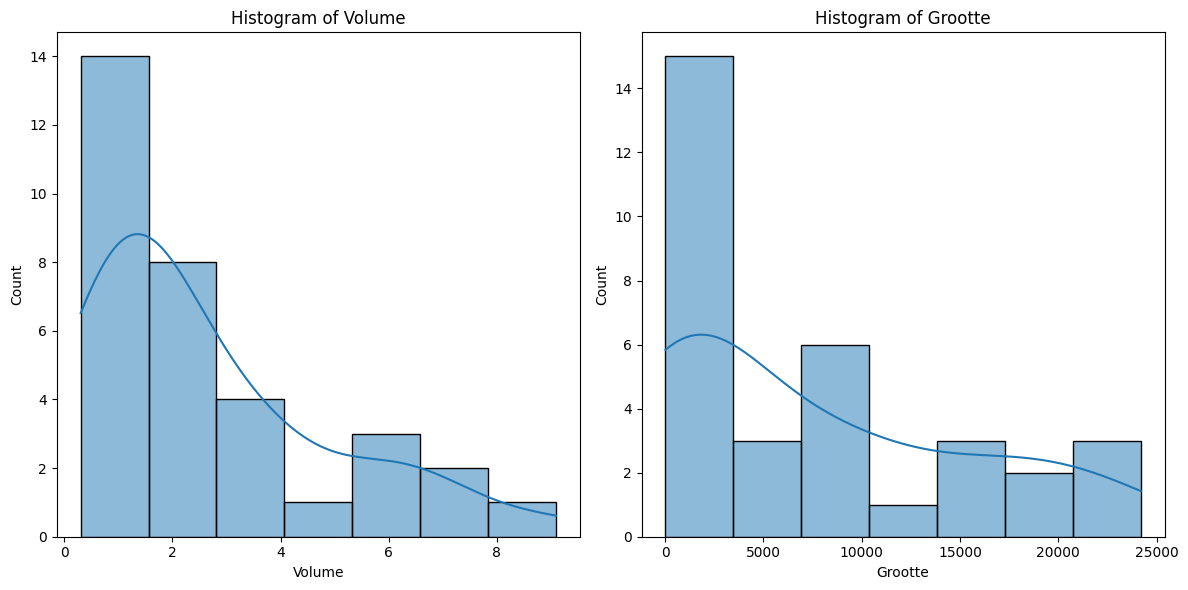

count    33.000000
mean      2.639394
std       2.258033
min       0.300000
25%       1.100000
50%       1.800000
75%       3.600000
max       9.100000
Name: Volume, dtype: float64
count       33.000000
mean      7568.181818
std       7852.979822
min         13.000000
25%        826.000000
50%       4082.000000
75%      13688.000000
max      24196.000000
Name: Grootte, dtype: float64


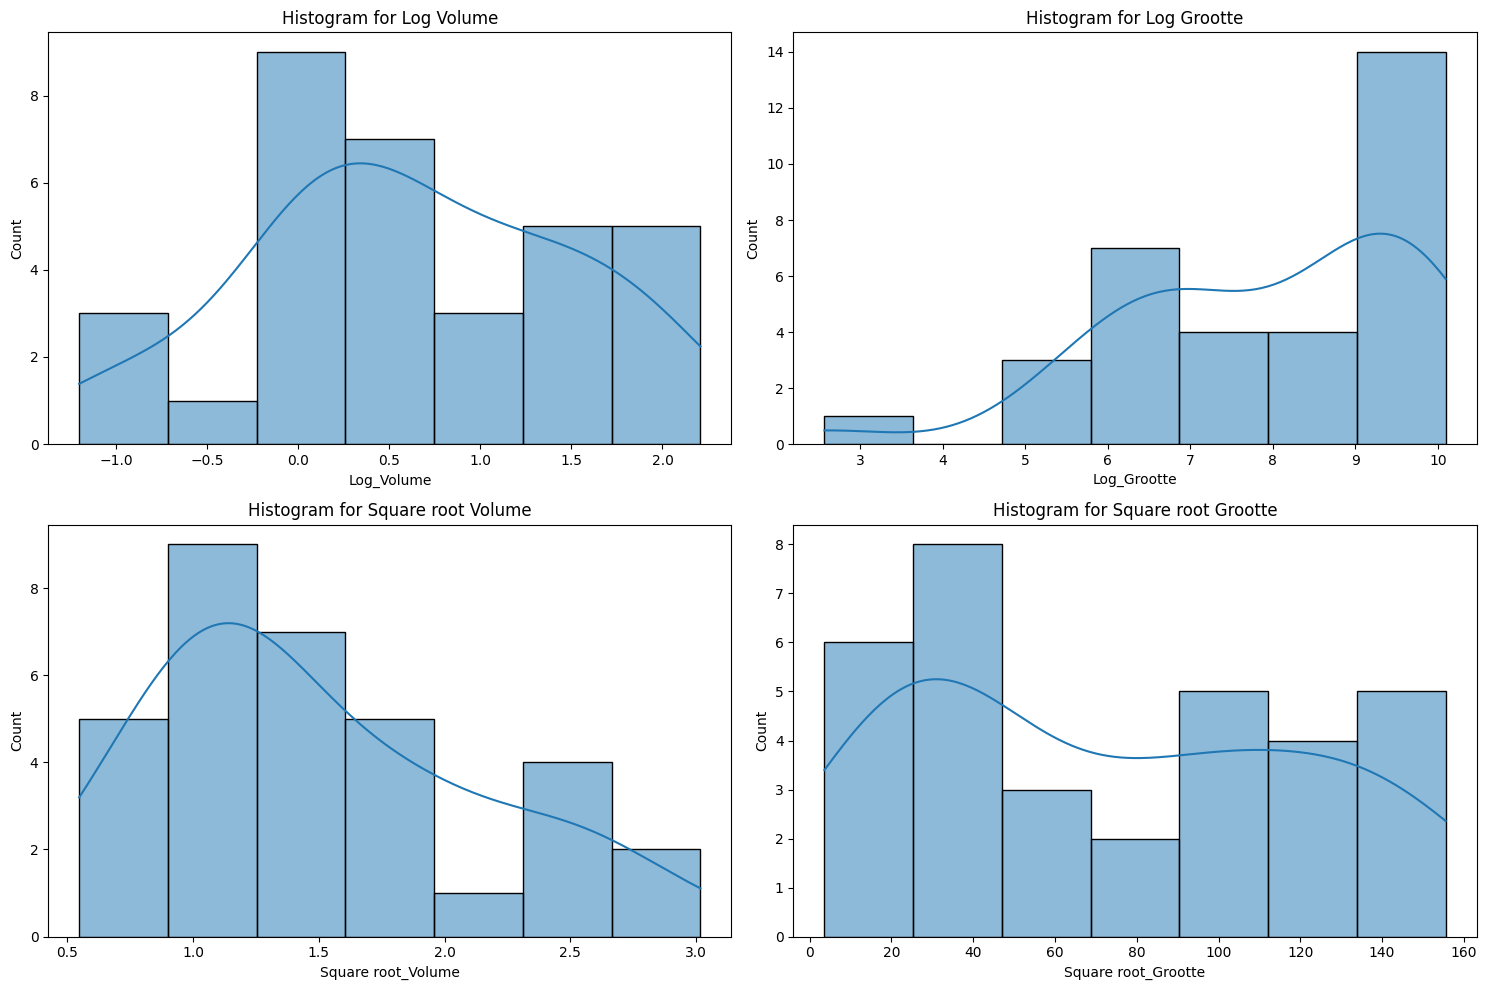

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Original Data 'Volume' and 'Grootte'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # subplot 1 (1 row, 2 columns, first plot)
sns.histplot(df['Volume'], kde=True)
plt.title('Histogram of Volume')

plt.subplot(1, 2, 2) # subplot 2 (1 row, 2 columns, second plot)
sns.histplot(df['Grootte'], kde=True)
plt.title('Histogram of Grootte')

plt.tight_layout()
plt.show()

print(df['Volume'].describe())
print(df['Grootte'].describe())


# Transformed Data
# Initialize the size of the grid based on the number of transformations
num_rows = len(transformations.keys())
fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows*5)) # adjust the figure size based on the number of rows

# Loop through transformations
for i, (name, function) in enumerate(transformations.items()):
    
    # Transform the data
    df[name + '_Volume'] = function(df['Volume'])
    df[name + '_Grootte'] = function(df['Grootte'])
    
    # Plot histogram for transformed Volume
    sns.histplot(df[name + '_Volume'].dropna(), kde=True, ax=axs[i, 0])
    axs[i, 0].set_title('Histogram for ' + name + ' Volume')
    
    # Plot histogram for transformed Grootte
    sns.histplot(df[name + '_Grootte'].dropna(), kde=True, ax=axs[i, 1])
    axs[i, 1].set_title('Histogram for ' + name + ' Grootte')

# Adjust layout
plt.tight_layout()
plt.show()


In [63]:
# Apply Shapiro-Wilk test on transformed data
for i, (name, function) in enumerate(transformations.items()):

    volume_stat, volume_p = stats.shapiro(df[name + '_Volume'].dropna())
    grootte_stat, grootte_p = stats.shapiro(df[name + '_Grootte'].dropna())

    print(f"{name} Volume:")
    print(f"\tW-statistic: {volume_stat}, p-value: {volume_p}")
    if volume_p > 0.05:
        print("\tFail to reject the null hypothesis, the data seems to be normally distributed.")
    else:
        print("\tReject the null hypothesis, the data does not seem to be normally distributed.")

    print(f"{name} Grootte:")
    print(f"\tW-statistic: {grootte_stat}, p-value: {grootte_p}")
    if grootte_p > 0.05:
        print("\tFail to reject the null hypothesis, the data seems to be normally distributed.")
    else:
        print("\tReject the null hypothesis, the data does not seem to be normally distributed.")


Log Volume:
	W-statistic: 0.9719041585922241, p-value: 0.5345546007156372
	Fail to reject the null hypothesis, the data seems to be normally distributed.
Log Grootte:
	W-statistic: 0.9056379795074463, p-value: 0.007484225556254387
	Reject the null hypothesis, the data does not seem to be normally distributed.
Square root Volume:
	W-statistic: 0.9330432415008545, p-value: 0.04275839403271675
	Reject the null hypothesis, the data does not seem to be normally distributed.
Square root Grootte:
	W-statistic: 0.9091149568557739, p-value: 0.009260003454983234
	Reject the null hypothesis, the data does not seem to be normally distributed.


In [24]:
import plotly.graph_objects as go

# Define the different shapes
shapes = {'Ja': 'diamond', 'Nee': 'circle'}

# Create a trace for each category
traces = []
for dik_eikel, group in df.groupby('Dikke_Eikel'):
    traces.append(go.Scatter3d(
        x=group['Grootte'],
        y=group['Volume'],
        z=group['Hoogte'],
        mode='markers',
        name=dik_eikel,
        marker=dict(
            size=6,
            color=group['color'],  # set color to a column in the dataframe
            symbol=shapes[dik_eikel]
        ),
        hoverinfo='name',
        showlegend=True
    ))

# Create the figure and add each trace
fig = go.Figure(data=traces)

# Set axes labels
fig.update_layout(scene=dict(
    xaxis_title='Grootte',
    yaxis_title='Volume',
    zaxis_title='Hoogte'
))

fig.show(renderer='iframe')

In [71]:
# Define 'large_acorn'
df['large_acorn'] = df['Volume'] >= 3

# Create contingency table
contingency_table = pd.crosstab(df['Regio'], df['large_acorn'])
print(contingency_table)

large_acorn  False  True 
Regio                    
Atlantic        17      6
California       5      5


In [72]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 0.878804347826087
p-value: 0.3485293680989825


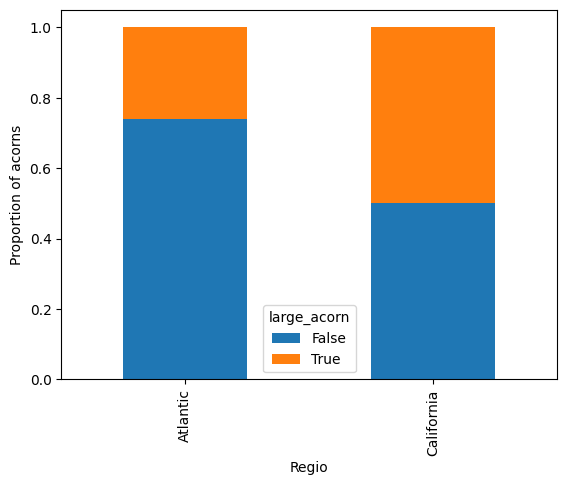

In [73]:
import matplotlib.pyplot as plt

# Normalize the contingency table by total in each row (each region) to get proportions
contingency_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

contingency_norm.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of acorns')
plt.show()



Complete data

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     3.892
Date:                Tue, 13 Jun 2023   Prob (F-statistic):             0.0575
Time:                        21:15:00   Log-Likelihood:                -116.50
No. Observations:                  33   AIC:                             237.0
Df Residuals:                      31   BIC:                             240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0609      1.817    

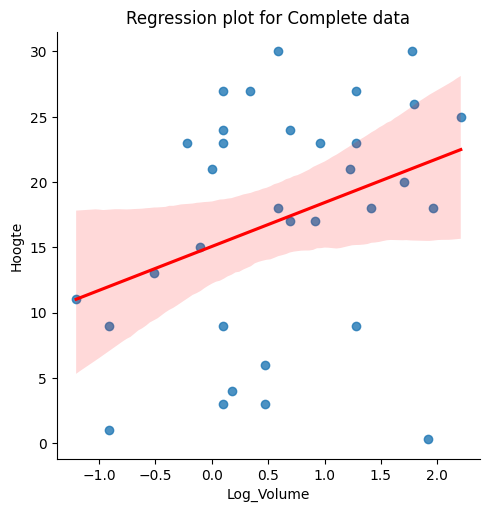

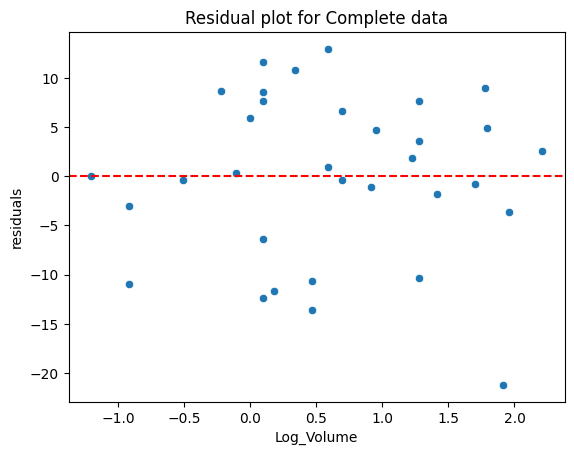

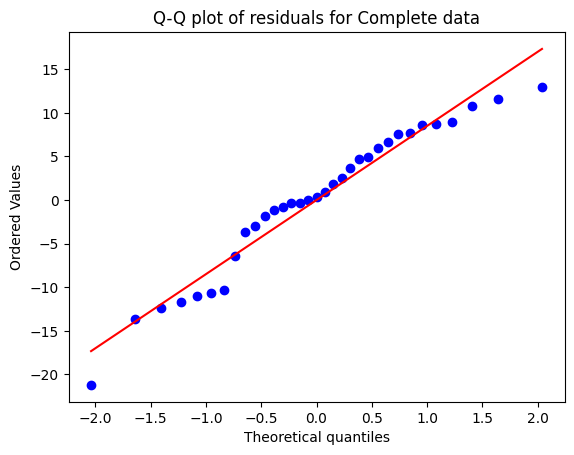


Regio: Atlantic

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.5372
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.472
Time:                        21:15:02   Log-Likelihood:                -82.754
No. Observations:                  23   AIC:                             169.5
Df Residuals:                      21   BIC:                             171.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9604      2.211  

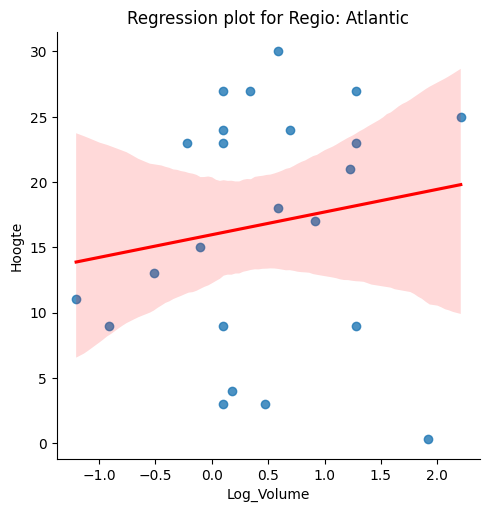

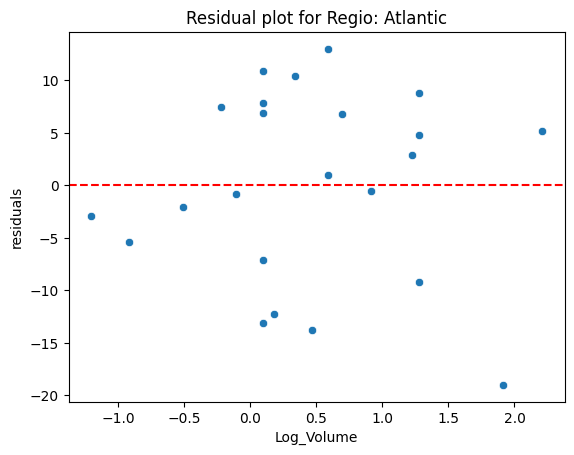

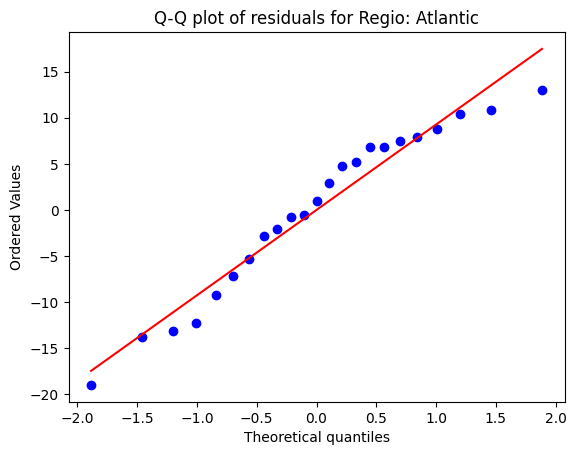


Regio: California

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     8.904
Date:                Tue, 13 Jun 2023   Prob (F-statistic):             0.0175
Time:                        21:15:03   Log-Likelihood:                -31.547
No. Observations:                  10   AIC:                             67.09
Df Residuals:                       8   BIC:                             67.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3549      2.997

/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



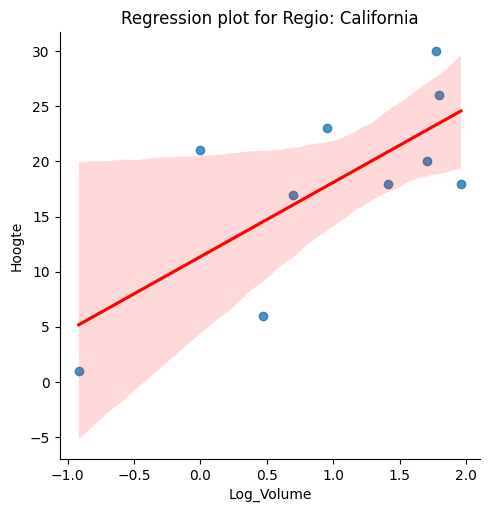

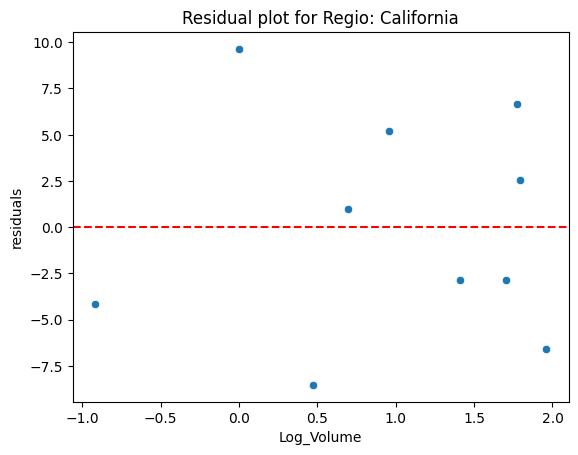

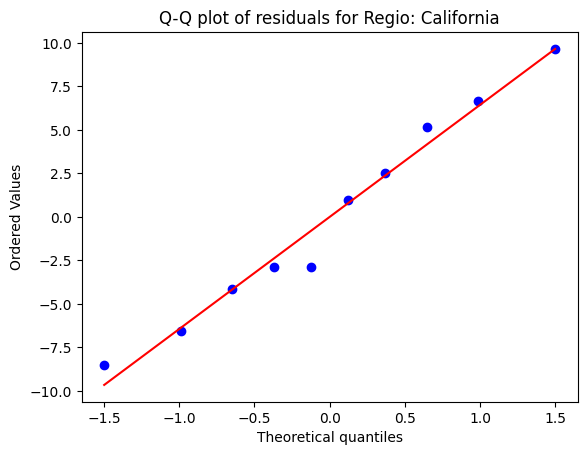


large_acorn: False

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.260
Date:                Tue, 13 Jun 2023   Prob (F-statistic):             0.0861
Time:                        21:15:04   Log-Likelihood:                -77.268
No. Observations:                  22   AIC:                             158.5
Df Residuals:                      20   BIC:                             160.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.1698      1.84

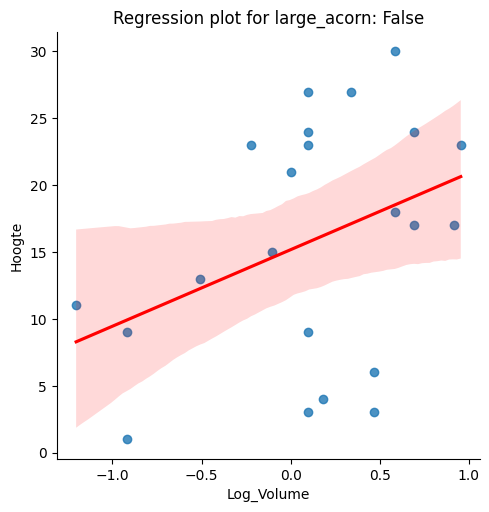

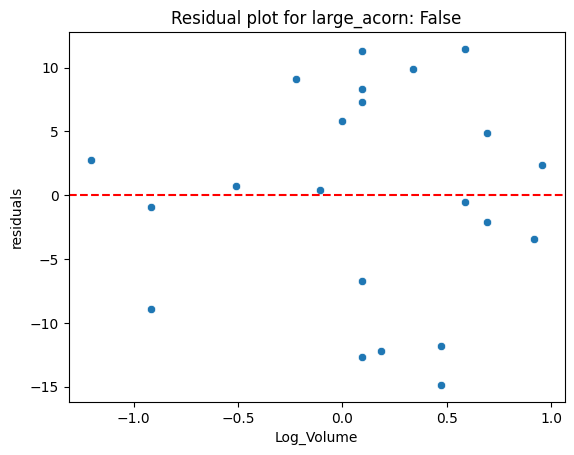

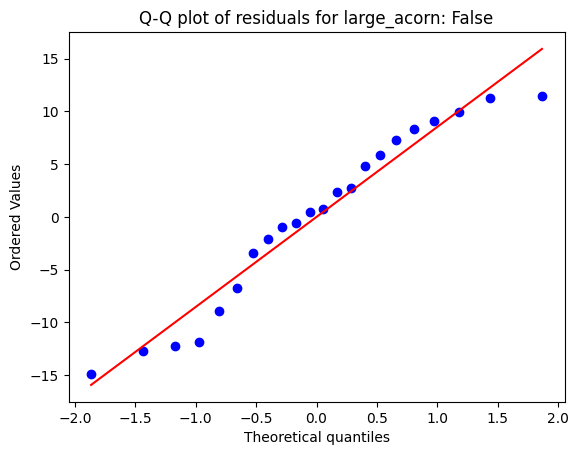


large_acorn: True

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                  0.004382
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.949
Time:                        21:15:05   Log-Likelihood:                -38.727
No. Observations:                  11   AIC:                             81.45
Df Residuals:                       9   BIC:                             82.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6573     13.906

/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=11



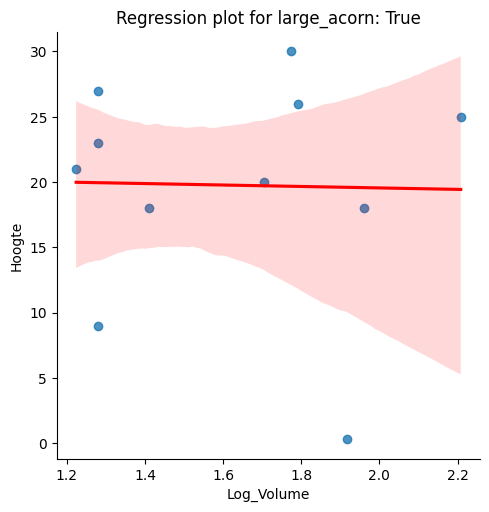

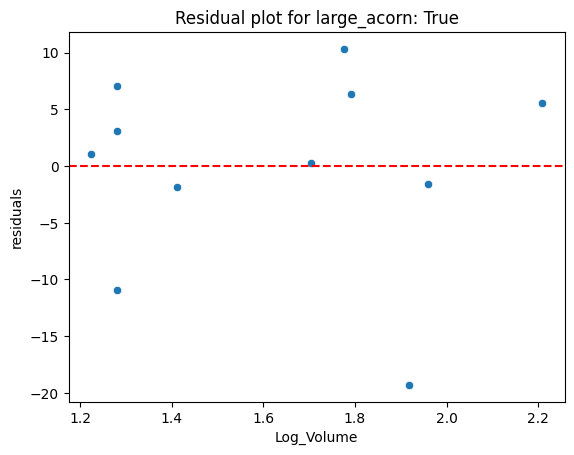

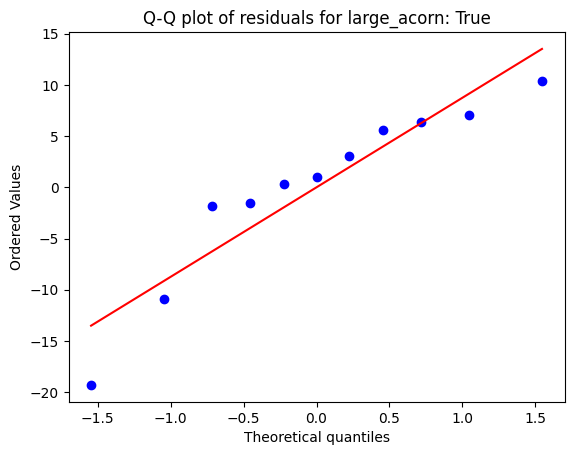


Regio: Atlantic, Large Acorn: False

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.469
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.244
Time:                        21:15:06   Log-Likelihood:                -60.061
No. Observations:                  17   AIC:                             124.1
Df Residuals:                      15   BIC:                             125.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     

/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



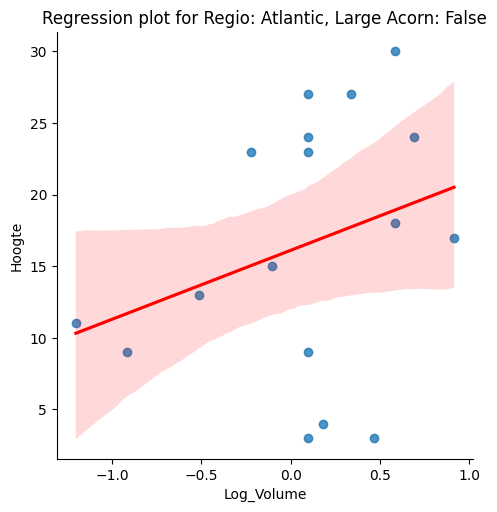

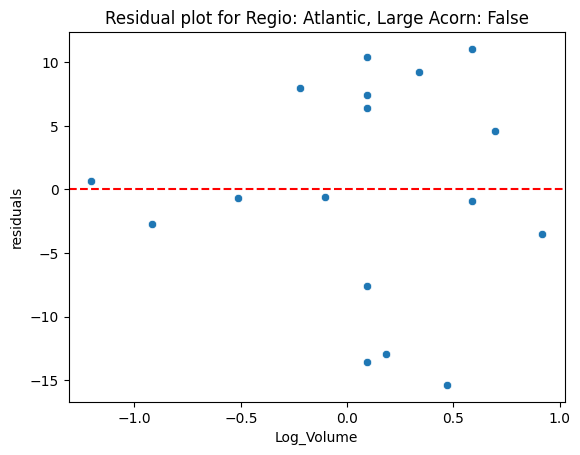

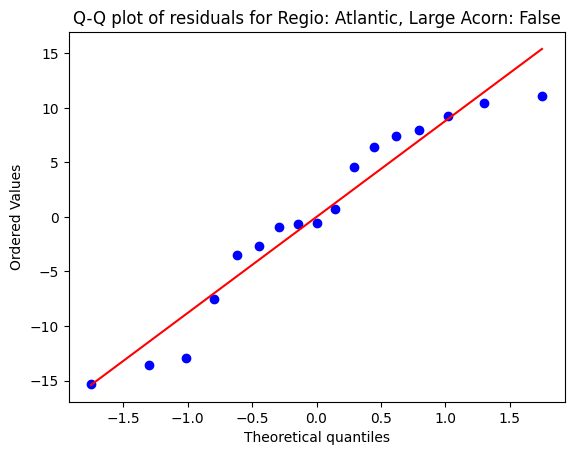


Regio: Atlantic, Large Acorn: True

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.204
Method:                 Least Squares   F-statistic:                    0.1520
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.717
Time:                        21:15:07   Log-Likelihood:                -21.995
No. Observations:                   6   AIC:                             47.99
Df Residuals:                       4   BIC:                             47.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2

/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



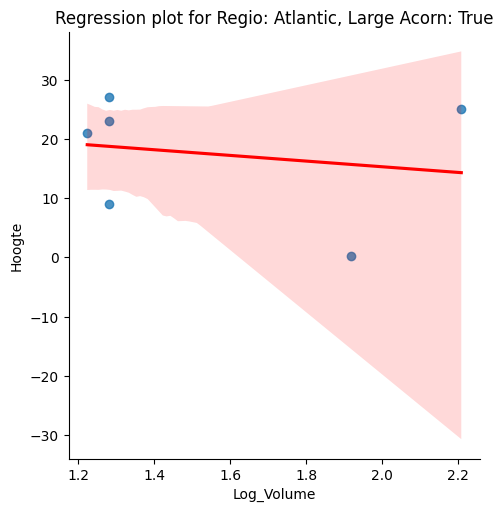

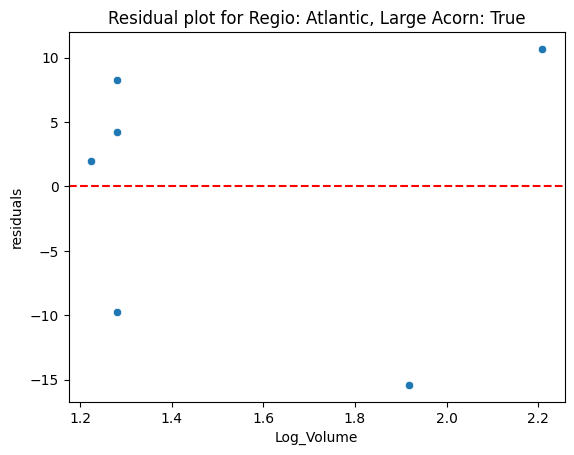

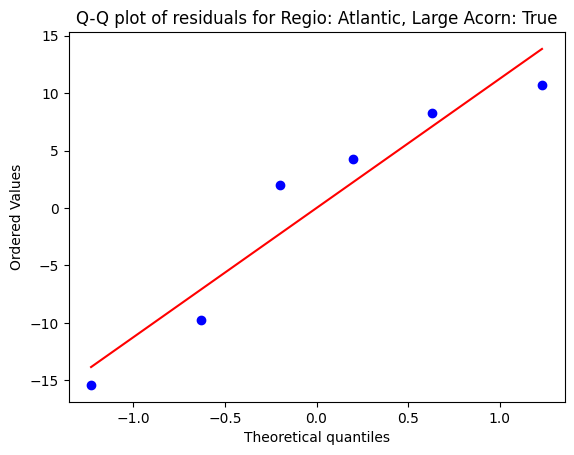


Regio: California, Large Acorn: False

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     2.598
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.205
Time:                        21:15:08   Log-Likelihood:                -16.303
No. Observations:                   5   AIC:                             36.61
Df Residuals:                       3   BIC:                             35.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



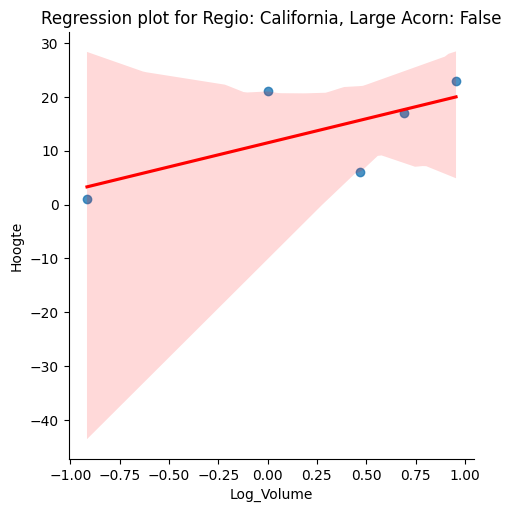

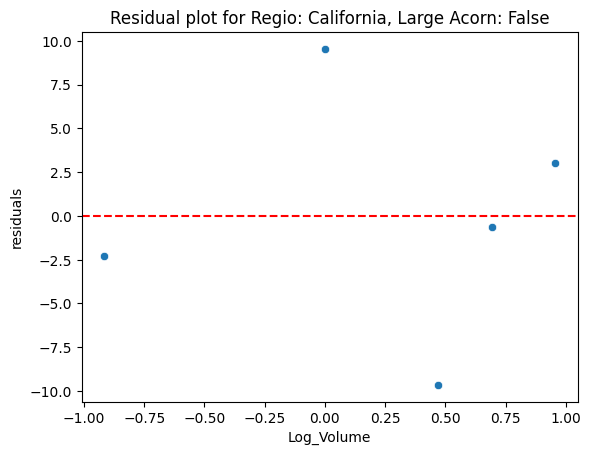

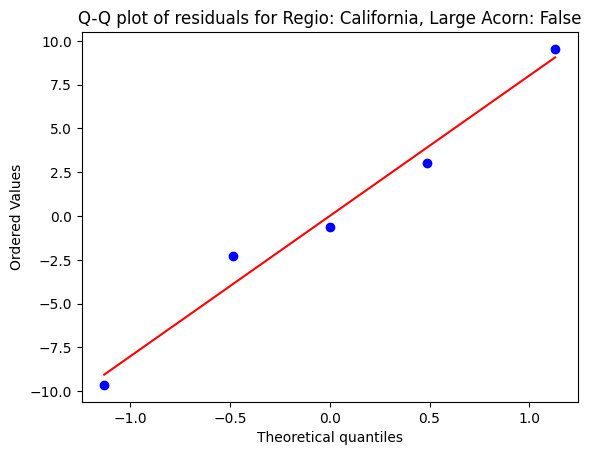


Regio: California, Large Acorn: True

                            OLS Regression Results                            
Dep. Variable:                 Hoogte   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.259
Method:                 Least Squares   F-statistic:                    0.1765
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.703
Time:                        21:15:10   Log-Likelihood:                -14.795
No. Observations:                   5   AIC:                             33.59
Df Residuals:                       3   BIC:                             32.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    

/Users/pimvandenbosch/Desktop/UA/Elementaire Statistiek/venv/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



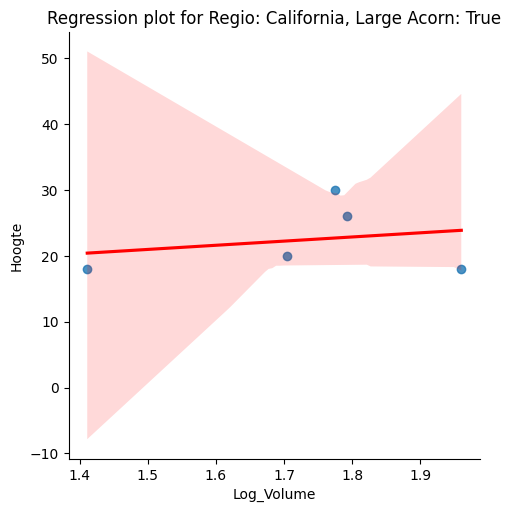

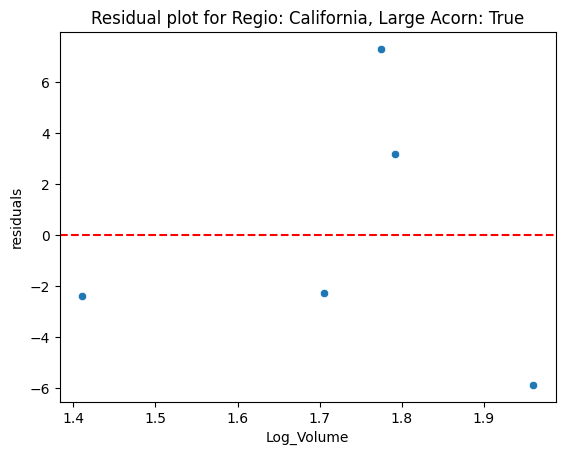

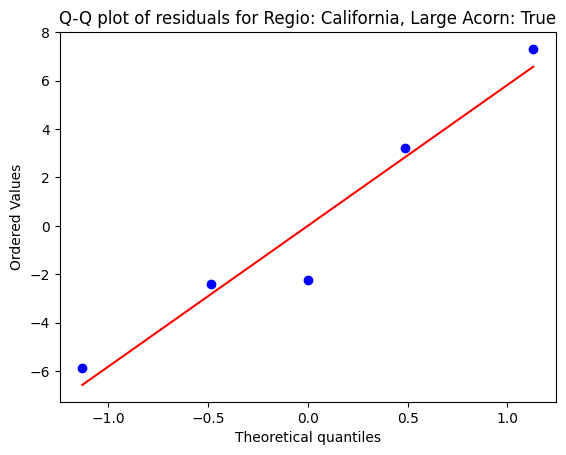

In [101]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def perform_analysis(df, predictor, response):
    # Analysis for just Log_Volume and Hoogte
    perform_regression_and_plot_residuals(df, predictor, response, 'Complete data')

    # Grouped analysis
    for group_by_var in ['Regio', 'large_acorn']:
        groups = df.groupby(group_by_var)
        for name, group in groups:
            perform_regression_and_plot_residuals(group, predictor, response, f'{group_by_var}: {name}')
    
    # Grouped by both Regio and large_acorn
    groups = df.groupby(['Regio', 'large_acorn'])
    for name, group in groups:
        perform_regression_and_plot_residuals(group, predictor, response, f'Regio: {name[0]}, Large Acorn: {name[1]}')

def perform_regression_and_plot_residuals(group, predictor, response, title_info):
    # Perform regression and print the summary
    model = smf.ols(f'{response} ~ {predictor}', data=group).fit()
    print(f'\n{title_info}\n')
    print(model.summary())

    # Plot the regression line with the data points
    sns.lmplot(x=predictor, y=response, data=group, line_kws={'color': 'red'})
    plt.title(f'Regression plot for {title_info}')
    plt.show()

    # Calculate and plot residuals
    group['residuals'] = group[response] - model.fittedvalues
    sns.scatterplot(x=predictor, y='residuals', data=group)
    plt.axhline(0, color='red', linestyle='--')  # Adds a horizontal line at zero
    plt.title(f'Residual plot for {title_info}')
    plt.show()

    # Q-Q plot of residuals
    stats.probplot(group['residuals'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of residuals for {title_info}')
    plt.show()

# Call the function
perform_analysis(df, 'Log_Volume', 'Hoogte')
